In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
len(train_labels)

60000

In [9]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [10]:
test_images.shape

(10000, 28, 28)

In [11]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

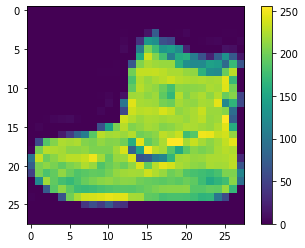

In [14]:
#데이터 전처리

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [15]:
#정규화
train_images = train_images / 255.0
test_images = test_images / 255.0


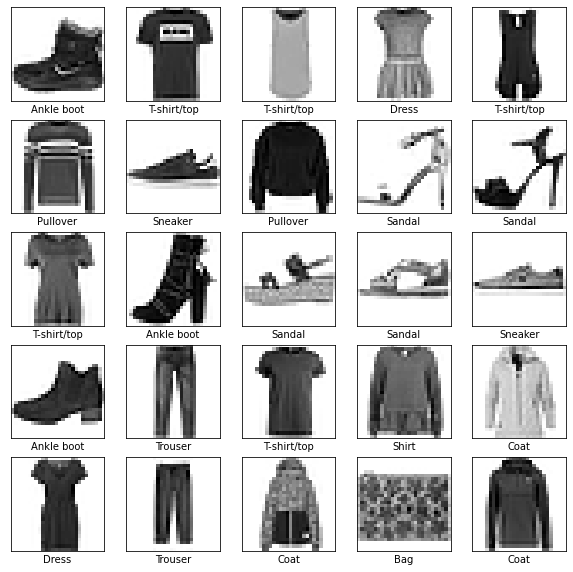

In [18]:
plt.figure(figsize = (10,10))
for i in range(25) :
    plt.subplot(5,5,i+1)   #5*5 서브 플롯에서 인덱스는 i+1을 해야 원하는 자리가 됨.
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

In [20]:
#모델 만들기

model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28,28)),
                tf.keras.layers.Dense(128, activation = 'relu'),  #128개 중에서 
                tf.keras.layers.Dense(10) #10개를 분류하겠다는 의미
                ])

In [26]:
model.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              
              metrics = ['accuracy'])


In [27]:
model.fit(train_images, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6314 - accuracy: 0.7816
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3802 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3392 - accuracy: 0.8760
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3066 - accuracy: 0.8866
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2975 - accuracy: 0.8904
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2638 - accuracy: 0.9011
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2552 - accuracy: 0.9044
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2430 - accuracy: 0.9097
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [30]:
#정확도 테스트

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
#verbose의 디폴트는 1, 진행 상황이 표출되는데 2를 입력하면 출력하지 않음.
#테스트 할 땐 2로 두고 진행 상황을 표출안하기도 함.
#학습 시킬 땐 표출하는 것이 좋은?
print("test accuracy : ", test_acc)

313/313 - 0s - loss: 0.3291 - accuracy: 0.8856
test accuracy :  0.8855999708175659


In [32]:
probability_model = tf.keras.Sequential([
                            model, tf.keras.layers.Softmax()
    
])

In [33]:
predictions = probability_model.predict(test_images)

In [35]:
predictions[0]

array([2.2211632e-06, 7.9999856e-09, 1.2753554e-07, 1.4435433e-12,
       1.3676342e-09, 7.7667166e-05, 2.1254654e-09, 2.0734682e-03,
       4.5476432e-09, 9.9784648e-01], dtype=float32)

In [36]:
sum(predictions[0])

0.999999984265848

In [39]:
np.argmax(predictions[0])

9

In [40]:
test_labels[0]

9

In [44]:
def plot_image(i, predictions_array, true_label, img) :
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap = plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label :
        color = 'blue'
    else :
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
    
def plot_value_array(i, predictions_array, true_label) :
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color = '#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

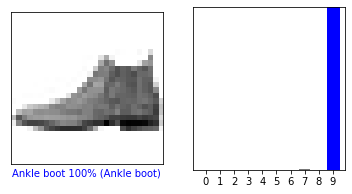

In [46]:
i = 0
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

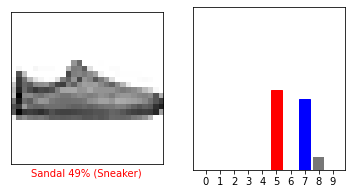

In [47]:
i = 12
plt.figure(figsize = (6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

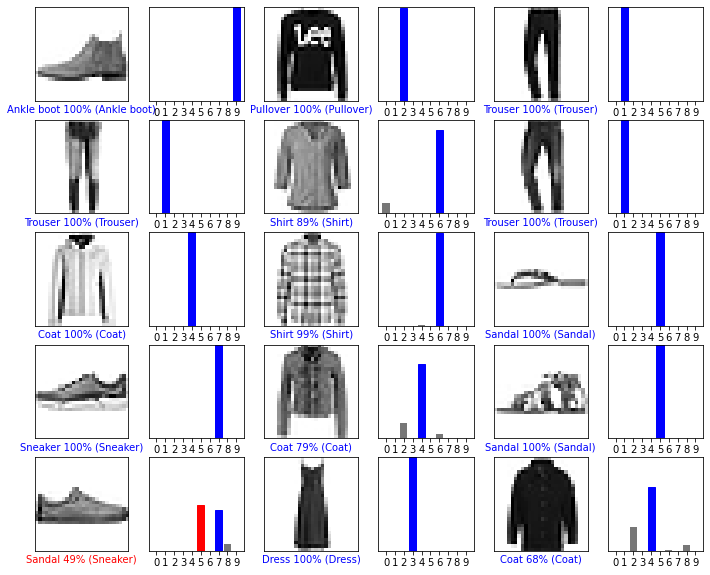

In [50]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.show()

In [57]:
#한 이미지에 대한 예측

img = test_images[0]

print(img.shape)

(28, 28)


In [58]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [60]:
predictions_single = model.predict(img)

print(predictions_single)

[[ -6.551301   -12.177648    -9.40869    -20.79774    -13.944004
   -2.9969015  -13.503095     0.28764609 -12.742482     6.4640217 ]]


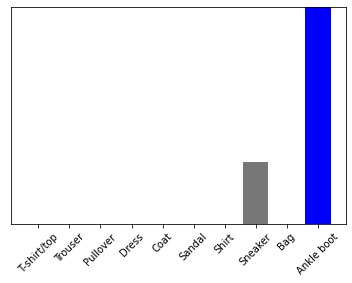

In [66]:
plot_value_array(0, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [55]:
np.argmax(predictions_single[0])

9